In [1]:
6

6

In [42]:
import pandas as pd
import numpy as np
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

print("✅ Step 1: Libraries imported successfully!")

# 📂 Load Dataset
data = pd.read_csv("Merged.csv")
print(data.head())

# 🧹 Clean Missing Values
print("\n🔍 Missing values before cleaning:\n", data.isnull().sum())
data = data.dropna()

# 🎯 Correct Label Mistakes
label_corrections = {
    "Neutural": "Neutral", "Meutral": "Neutral", "N EUTRAL": "Neutral",
    "NEUTRANEG": "Neutral", "Negetive": "Negative", "NEGNEG": "Negative",
    "Negativee": "Negative", "NEG": "Negative"
}
data['tag'] = data['tag'].replace(label_corrections)

# ❌ Remove Neutral Samples
data = data[data['tag'] != 'Neutral']
unique_labels = data['tag'].unique()
print("\n🏷️ Unique labels after cleaning:", unique_labels)

# ⚖️ Balance the Dataset
positive_class_label = unique_labels[0]
positive_class = data[data['tag'] == positive_class_label]
if len(positive_class) >= 8580:
    rows_to_remove = positive_class.sample(n=8580, random_state=42)
    data = data.drop(rows_to_remove.index)
print(f"\n✅ Remaining positive class count: {len(data[data['tag'] == positive_class_label])}")

# ✂️ Split Data
text_column = 'comment'
target_column = 'tag'
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

# 💡 Load Bangla Stopwords
stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt"
response = requests.get(stopwords_url)
if response.status_code == 200:
    stop_words_bangla = set(response.text.splitlines())
    df_train[text_column] = df_train[text_column].apply(lambda x: ' '.join(
        [word for word in str(x).split() if word.lower() not in stop_words_bangla]))
    df_test[text_column] = df_test[text_column].apply(lambda x: ' '.join(
        [word for word in str(x).split() if word.lower() not in stop_words_bangla]))

# 💻 TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(df_train[text_column])
X_test_tfidf = vectorizer.transform(df_test[text_column])

# 🎯 Label Encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train[target_column])
y_test = label_encoder.transform(df_test[target_column])

print("\n✅ Step 2: Data preprocessed successfully!")

# 🌳 Train CART Classifier
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train_tfidf, y_train)

print("\n✅ Step 3: CART Model trained successfully!")

# 🎯 Predict and Evaluate
y_pred = cart_model.predict(X_test_tfidf)


✅ Step 1: Libraries imported successfully!
                                             comment       tag
0  আলহামদুলিল্লাহ সোনার বাংলার সোনার ছেলেরা দেশকে...  Positive
1                                           মাশাল্লা  Positive
2                                          এগিয়ে যাও  Positive
3                                            চমৎকার।  Positive
4  দেশের শিল্প পতিদের উচিত দেশিও প্রযুক্তি গুলোকে...   Neutral

🔍 Missing values before cleaning:
 comment    0
tag        5
dtype: int64

🏷️ Unique labels after cleaning: ['Positive' 'Negative']

✅ Remaining positive class count: 13690

✅ Step 2: Data preprocessed successfully!

✅ Step 3: CART Model trained successfully!


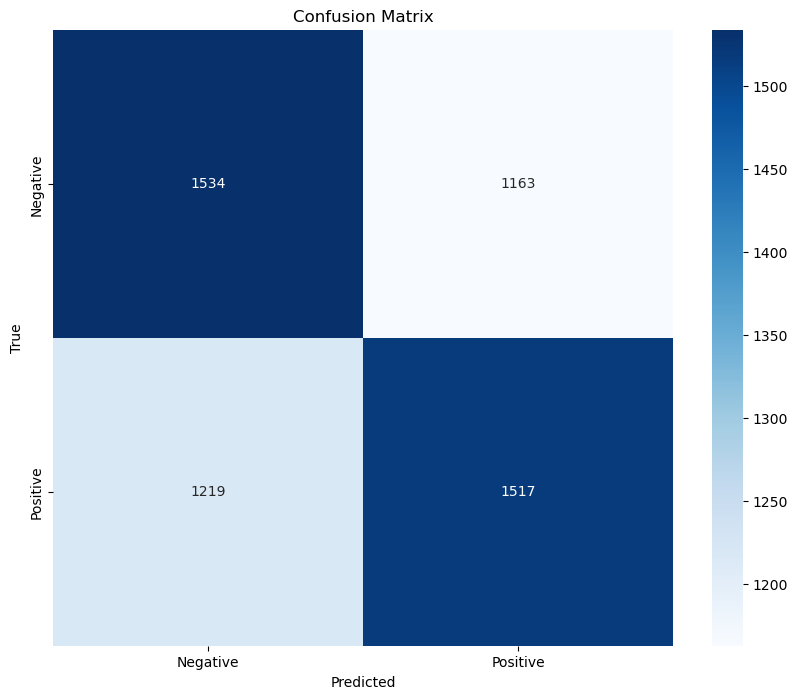


✅ Step 4: Confusion Matrix generated!


In [43]:
# 📊 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = label_encoder.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\n✅ Step 4: Confusion Matrix generated!")

In [44]:
# 📝 Classification Report
print("📝 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\n✅ Step 5: Classification report generated!")

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.56      2697
           1       0.57      0.55      0.56      2736

    accuracy                           0.56      5433
   macro avg       0.56      0.56      0.56      5433
weighted avg       0.56      0.56      0.56      5433


✅ Step 5: Classification report generated!
